# Gravity Assist Maneuver
Alejandro Alonso | Final Project for Matter, Energy, Space, and Time

## Project Assumptions

- Spaceship moves strictly forward at constant velocity (As in conserving fuel)
- Assume planet movement is negligible (assume planet is stationary)
- Spaceship starts when planet's exerted gravitational force is exactly 0.01 Newtons
- Spaceship is initally aimed towards a point X planetary radii away from center of planet (see constants) (D)
- All calculations from "perspective" of spaceship
- Spaceship starts at (0, 0)
- Planet starts at (1.5R, D)
- 


## Imports

In [22]:
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from components import G, Point, Planet, Spaceship

## Constants
Change as wanted, recommended values are in comments

In [ ]:
M_planet = 5.972e21  # 5.972e20
M_spacecraft = 1e4  # 1e4
V_spacecraft = 100  # 100
R_planet = 6e6  # 6e6
planet_starting_x_dist = 5 * R_planet  # 5 * R_planet
threshold = 1  # 1

## Simulation Setup

In [24]:
distance_from_spaceship = math.sqrt(
    G * M_planet * M_spacecraft / threshold
)

planet_origin = Point(planet_starting_x_dist, (
        distance_from_spaceship ** 2 - planet_starting_x_dist ** 2
    ) ** 0.5)

planet = Planet(M_planet, R_planet, planet_origin)

Planet(Mass=5.972e+21, Radius=6000000.0, Origin=(30000000.0, 55550805.214686126))
Starting Locations


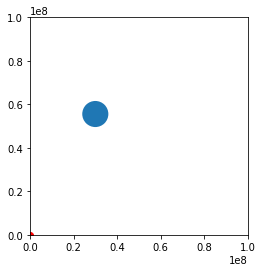

In [27]:
print(planet)
print("Starting Locations")

circle = patches.Circle(planet.origin.coordinates, planet.radius)
#circle = patches.Circle((5e10, 5e10), 1e10)

fig, ax = plt.subplots()
ax.add_patch(circle)

ax.set_xlim(0, 100000000)
ax.set_ylim(0, 100000000)
ax.set_aspect('equal')

ax.plot(0, 0, 'ro')

#ax.plot(0, 0, 'ro')
plt.show()

In [28]:
spaceship = Spaceship(M_spacecraft, V_spacecraft)
print(spaceship)

Spaceship(Mass=10000.0, Vy=100, Vx=0)


In [29]:
while (
        spaceship.location.distance_to(planet.origin) <= distance_from_spaceship 
        and not spaceship.crashed
    ):
    spaceship.move(planet)

final_heading = spaceship.get_heading_change()
final_velocity = spaceship.velocity

print(f"Spaceship Crashed: {spaceship.crashed}")
print(f"Heading: {final_heading}\nVelocity: {final_velocity}")

Spaceship Crashed: False
Heading: 170.6548460613149
Velocity: 66.88326442482223


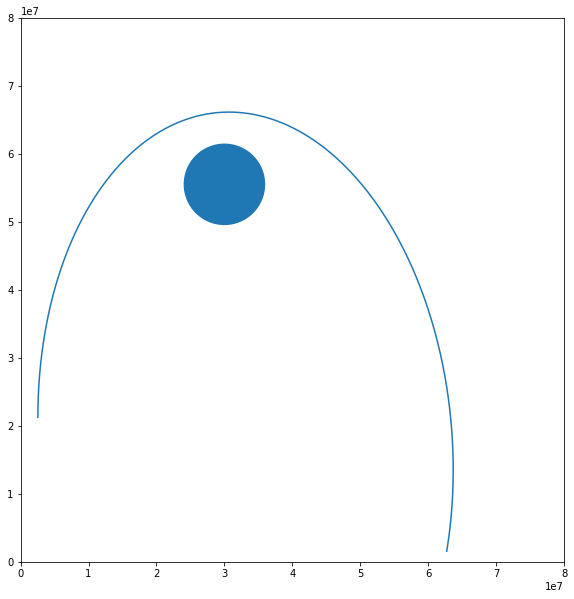

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
circle = patches.Circle(planet.origin.coordinates, planet.radius)

ax.add_patch(circle)
ax.plot(*zip(*spaceship._path))

ax.set_xlim(0, 80000000)
ax.set_ylim(0, 80000000)
ax.set_aspect('equal')

plt.show()